In [1]:
import sys, time
import pandas as pd
import numpy as np
import networkx
from pyvis.network import Network
from pyvis import network as net
from io import StringIO
import datetime as dt
import igraph as ig
import matplotlib.pyplot as plt
from IPython.display import display
from bokeh.io import output_notebook, show, save
output_notebook()

Loading BokehJS ...

In [10]:
csvString = """
Source,Target,Weight
Accident,PTSD/C-PTSD,20
Alexithymia,Inactivity,10
Alexithymia,Interoception Issues,10
Allergies/Asthma,Brain Fog,10
Allergies/Asthma,Burn(out),5
Allergies/Asthma,Depression,10
Allergies/Asthma,Difficulty Concentrating,5
Allergies/Asthma,Dysregulation,10
Allergies/Asthma,Fatigue,10
Allergies/Asthma,Headache/Migraine,10
Allergies/Asthma,Inactivity,10
Allergies/Asthma,Irritability,10
Allergies/Asthma,Isolation/Loneliness,15
Allergies/Asthma,Meltdown,10
Allergies/Asthma,Shutdown,10
Allergies/Asthma,Skin Problems,20
Allergies/Asthma,Working Memory Issues,15
Anxiety + Social Anxiety,Inactivity,10
Anxiety + Social Anxiety,PTSD/C-PTSD,10
Anxiety + Social Anxiety,Sensory Dysregulation,10
Anxiety + Social Anxiety,Substance Abuse,10
Assault/Abuse/SA,Alexithymia,20
Assault/Abuse/SA,Anxiety + Social Anxiety,20
Assault/Abuse/SA,Avoidance,20
Assault/Abuse/SA,Burn(out),20
Assault/Abuse/SA,Depression,20
Assault/Abuse/SA,Dysregulation,20
Assault/Abuse/SA,Homelessness,20
Assault/Abuse/SA,Inactivity,20
Assault/Abuse/SA,Interoception Issues,20
Assault/Abuse/SA,Meltdown,20
Assault/Abuse/SA,PTSD/C-PTSD,20
Assault/Abuse/SA,Sensory Dysregulation,20
Assault/Abuse/SA,Shutdown,20
Assault/Abuse/SA,SI->MD,20
Assault/Abuse/SA,Stigma,20
Assault/Abuse/SA,Substance Abuse,20
Assault/Abuse/SA,Toxic Stress,20
Assault/Abuse/SA,Trouble Maintaining Relationships,20
Assimilation,Alexithymia,20
Assimilation,Burn(out),20
Assimilation,Interoception Issues,20
Assimilation,Meltdown,20
Assimilation,PTSD/C-PTSD,20
Assimilation,Sensory Dysregulation,20
Assimilation,Shutdown,20
Autoimmune Diseases,Brain Fog,10
Autoimmune Diseases,Depression,2
Autoimmune Diseases,Difficulty Concentrating,10
Autoimmune Diseases,Digestive Problems,2
Autoimmune Diseases,Dry skin/sensitivity to cold,2
Autoimmune Diseases,Fatigue,10
Autoimmune Diseases,Fibromyalgia,2
Autoimmune Diseases,Inactivity,10
Autoimmune Diseases,Recurring fever,2
Autoimmune Diseases,Skin Problems,20
Autoimmune Diseases,Swollen glands,20
Autoimmune Diseases,Weight changes,2
Autoimmune Diseases,Working Memory Issues,2
Bipolar Disorder,Anxiety + Social Anxiety,2
Bipolar Disorder,Cancer,2
Bipolar Disorder,Depression,20
Bipolar Disorder,Dysregulation,20
Bipolar Disorder,Heart Disease,2
Bipolar Disorder,Homelessness,2
Bipolar Disorder,Inactivity,10
Bipolar Disorder,SI->MD,2
Bipolar Disorder,Substance Abuse,2
Bipolar Disorder,Trouble Maintaining Relationships,10
Bipolar Disorder,Weight changes,2
Bullying/Shunning,Alexithymia,6
Bullying/Shunning,Anxiety + Social Anxiety,6
Bullying/Shunning,Avoidance,6
Bullying/Shunning,Burn(out),20
Bullying/Shunning,Depression,15
Bullying/Shunning,Dysregulation,15
Bullying/Shunning,Homelessness,6
Bullying/Shunning,Inactivity,8
Bullying/Shunning,Interoception Issues,6
Bullying/Shunning,Meltdown,20
Bullying/Shunning,PTSD/C-PTSD,
Bullying/Shunning,Sensory Dysregulation,30
Bullying/Shunning,Shutdown,20
Bullying/Shunning,SI->MD,6
Bullying/Shunning,Stigma,10
Bullying/Shunning,Substance Abuse,6
Bullying/Shunning,Toxic Stress,8
Bullying/Shunning,Trouble Maintaining Relationships,6
Burn(out),Inactivity,30
Childhood Toxic Stress,Bipolar Disorder,6
Childhood Toxic Stress,Depression,20
Childhood Toxic Stress,Dysregulation,20
Childhood Toxic Stress,Psychosis/Schizophrenia,6
Childhood Toxic Stress,PTSD/C-PTSD,6
Childhood Toxic Stress,Sensory Dysregulation,6
Childhood Toxic Stress,Toxic Stress,8
Childhood Toxic Stress,Trouble Maintaining Relationships,6
Chronic Infection,Cancer,1
Chronic Infection,Depression,15
Chronic Infection,Dysregulation,20
Chronic Infection,Inactivity,10
Chronic Infection,Sensory Dysregulation,15
Chronic Insomnia,Accident risk,4
Chronic Insomnia,Anxiety + Social Anxiety,4
Chronic Insomnia,Brain Fog,20
Chronic Insomnia,Burn(out),20
Chronic Insomnia,Depression,15
Chronic Insomnia,Difficulty Concentrating,20
Chronic Insomnia,Digestive Problems,4
Chronic Insomnia,Dysregulation,20
Chronic Insomnia,Fatigue,20
Chronic Insomnia,Headache/Migraine,10
Chronic Insomnia,Heart Disease,4
Chronic Insomnia,High Blood Pressure,4
Chronic Insomnia,Homelessness,20
Chronic Insomnia,Inactivity,10
Chronic Insomnia,Irritability,20
Chronic Insomnia,Meltdown,20
Chronic Insomnia,Poor School/Job Performance,4
Chronic Insomnia,Sensory Dysregulation,20
Chronic Insomnia,Shutdown,20
Chronic Insomnia,Substance Abuse,4
Chronic Insomnia,Working Memory Issues,4
Cold/Flu/Infection,Brain Fog,10
Cold/Flu/Infection,Burn(out),5
Cold/Flu/Infection,Depression,10
Cold/Flu/Infection,Difficulty Concentrating,5
Cold/Flu/Infection,Dysregulation,10
Cold/Flu/Infection,Fatigue,10
Cold/Flu/Infection,Headache/Migraine,10
Cold/Flu/Infection,Inactivity,10
Cold/Flu/Infection,Irritability,5
Cold/Flu/Infection,Isolation/Loneliness,15
Cold/Flu/Infection,Meltdown,10
Cold/Flu/Infection,Sensory Dysregulation,15
Cold/Flu/Infection,Shutdown,10
Cold/Flu/Infection,Skin Problems,10
Cold/Flu/Infection,Swollen glands,20
Cold/Flu/Infection,Working Memory Issues,15
Compensation,Alexithymia,15
Compensation,Burn(out),15
Compensation,Interoception Issues,15
Compensation,Meltdown,15
Compensation,Sensory Dysregulation,15
Compensation,Shutdown,15
Death of a Loved One,Anxiety + Social Anxiety,10
Death of a Loved One,Depression,10
Death of a Loved One,Isolation/Loneliness,10
Death of a Loved One,PTSD/C-PTSD,10
Death of a Loved One,Trouble Maintaining Relationships,10
Depression,Burn(out),6
Depression,Chronic Insomnia,6
Depression,Dysregulation,20
Depression,Fibromyalgia/AMPS,10
Depression,Headache/Migraine,10
Depression,Inactivity,10
Depression,Interoception Issues,6
Depression,Irritability,15
Depression,Isolation/Loneliness,6
Depression,Meltdown,10
Depression,PTSD/C-PTSD,
Depression,Sensory Dysregulation,6
Depression,Shutdown,10
Depression,SI->MD,6
Depression,Substance Abuse,10
Depression,Trouble Maintaining Relationships,6
Dysregulation,Alexithymia,10
Dysregulation,Anxiety + Social Anxiety,12
Dysregulation,Burn(out),20
Dysregulation,Chronic Insomnia,10
Dysregulation,Depression,15
Dysregulation,Difficulty Concentrating,20
Dysregulation,Executive Function,10
Dysregulation,Fatigue,20
Dysregulation,Inactivity,10
Dysregulation,Interoception Issues,10
Dysregulation,Irritability,15
Dysregulation,Isolation/Loneliness,15
Dysregulation,Meltdown,10
Dysregulation,Sensory Dysregulation,30
Dysregulation,SI->MD,10
Dysregulation,Stigma,10
Dysregulation,Substance Abuse,10
Dysregulation,Toxic Stress,8
Dysregulation,Trouble Maintaining Relationships,6
Dysregulation,Working Memory Issues,20
Fibromyalgia/AMPS,Alondynia,10
Fibromyalgia/AMPS,Brain Fog,10
Fibromyalgia/AMPS,Chronic Insomnia,10
Fibromyalgia/AMPS,Depression,20
Fibromyalgia/AMPS,Dysregulation,10
Fibromyalgia/AMPS,Fatigue,20
Fibromyalgia/AMPS,Headache/Migraine,10
Fibromyalgia/AMPS,Inactivity,15
Fibromyalgia/AMPS,Isolation/Loneliness,10
Fibromyalgia/AMPS,Sensory Dysregulation,10
Fibromyalgia/AMPS,Substance Abuse,15
Gaslighting,Alexithymia,8
Gaslighting,Anxiety + Social Anxiety,8
Gaslighting,Avoidance,8
Gaslighting,Burn(out),20
Gaslighting,Depression,10
Gaslighting,Dysregulation,15
Gaslighting,Homelessness,8
Gaslighting,Interoception Issues,8
Gaslighting,Meltdown,20
Gaslighting,PTSD/C-PTSD,20
Gaslighting,Sensory Dysregulation,50
Gaslighting,Shutdown,20
Gaslighting,SI->MD,8
Gaslighting,Stigma,10
Gaslighting,Substance Abuse,8
Gaslighting,Toxic Stress,8
Gaslighting,Trouble Maintaining Relationships,6
Headache/Migraine,Burn(out),5
Headache/Migraine,Depression,15
Headache/Migraine,Difficulty Concentrating,20
Headache/Migraine,Dysregulation,10
Headache/Migraine,Fatigue,20
Headache/Migraine,Inactivity,10
Headache/Migraine,Irritability,20
Headache/Migraine,Isolation/Loneliness,20
Headache/Migraine,Meltdown,20
Headache/Migraine,Sensory Dysregulation,20
Headache/Migraine,Shutdown,20
Headache/Migraine,Substance Abuse,15
Headache/Migraine,Working Memory Issues,20
Inactivity,Depression,20
Interoception Issues,Alexithymia,10
Interoception Issues,Burn(out),10
Interoception Issues,Chronic Insomnia,10
Interoception Issues,Dysregulation,10
Interoception Issues,Fatigue,10
Interoception Issues,Fibromyalgia/AMPS,10
Interoception Issues,Irritability,10
Interoception Issues,Meltdown,10
Interoception Issues,Sensory Dysregulation,10
Interoception Issues,Shutdown,10
Isolation/Loneliness,Depression,20
Isolation/Loneliness,Dysregulation,10
Isolation/Loneliness,Inactivity,10
Isolation/Loneliness,Sensory Dysregulation,10
Isolation/Loneliness,Stigma,10
Masking,Alexithymia,10
Masking,Burn(out),10
Masking,Interoception Issues,10
Masking,Meltdown,10
Masking,Sensory Dysregulation,10
Masking,Shutdown,10
Meltdown,Burn(out),5
Meltdown,Inactivity,10
Meltdown,Shutdown,15
Natural Disaster,PTSD/C-PTSD,
Psychosis/Schizophrenia,Anxiety + Social Anxiety,20
Psychosis/Schizophrenia,Bipolar Disorder,2
Psychosis/Schizophrenia,Cancer,2
Psychosis/Schizophrenia,Depression,2
Psychosis/Schizophrenia,Dysregulation,2
Psychosis/Schizophrenia,Heart Disease,2
Psychosis/Schizophrenia,Homelessness,20
Psychosis/Schizophrenia,Inactivity,10
Psychosis/Schizophrenia,PTSD/C-PTSD,
Psychosis/Schizophrenia,Sensory Dysregulation,2
Psychosis/Schizophrenia,SI->MD,2
Psychosis/Schizophrenia,Substance Abuse,15
Psychosis/Schizophrenia,Trouble Maintaining Relationships,15
Psychosis/Schizophrenia,Weight changes,2
PTSD/C-PTSD,Alexithymia,6
PTSD/C-PTSD,Anxiety + Social Anxiety,6
PTSD/C-PTSD,Avoidance,6
PTSD/C-PTSD,Burn(out),20
PTSD/C-PTSD,Chronic Insomnia,15
PTSD/C-PTSD,Depression,15
PTSD/C-PTSD,Dysregulation,15
PTSD/C-PTSD,Homelessness,6
PTSD/C-PTSD,Inactivity,8
PTSD/C-PTSD,Interoception Issues,6
PTSD/C-PTSD,Meltdown,20
PTSD/C-PTSD,Sensory Dysregulation,30
PTSD/C-PTSD,Shutdown,20
PTSD/C-PTSD,SI->MD,6
PTSD/C-PTSD,Stigma,10
PTSD/C-PTSD,Substance Abuse,6
PTSD/C-PTSD,Toxic Stress,8
PTSD/C-PTSD,Trouble Maintaining Relationships,6
Sensory Dysregulation,Accident risk,8
Sensory Dysregulation,Alexithymia,10
Sensory Dysregulation,Anxiety + Social Anxiety,12
Sensory Dysregulation,Burn(out),20
Sensory Dysregulation,Chronic Insomnia,10
Sensory Dysregulation,Depression,15
Sensory Dysregulation,Difficulty Concentrating,20
Sensory Dysregulation,Dysregulation,20
Sensory Dysregulation,Executive Function,10
Sensory Dysregulation,Fatigue,20
Sensory Dysregulation,Inactivity,10
Sensory Dysregulation,Interoception Issues,10
Sensory Dysregulation,Irritability,15
Sensory Dysregulation,Isolation/Loneliness,15
Sensory Dysregulation,Meltdown,20
Sensory Dysregulation,Shutdown,20
Sensory Dysregulation,SI->MD,10
Sensory Dysregulation,Stigma,10
Sensory Dysregulation,Substance Abuse,10
Sensory Dysregulation,Toxic Stress,8
Sensory Dysregulation,Trouble Maintaining Relationships,10
Sensory Dysregulation,Working Memory Issues,20
Serious Medical Condition,PTSD/C-PTSD,10
Shutdown,Burn(out),10
Shutdown,Inactivity,20
Shutdown,Meltdown,5
Stigma,Inactivity,10
Stigma,Isolation/Loneliness,20
Stigma,PTSD/C-PTSD,10
Stigma,Substance Abuse,15
Stigma,Toxic Stress,20
Substance Abuse,Homelessness,10
Substance Abuse,PTSD/C-PTSD,10
Susceptible to viral infections,Cancer,2
Toxic Stress,Allergies/Asthma,2
Toxic Stress,Autoimmune Diseases,2
Toxic Stress,Bipolar Disorder,2
Toxic Stress,Brain Fog,2
Toxic Stress,Chronic Infection,2
Toxic Stress,Chronic Insomnia,10
Toxic Stress,Depression,20
Toxic Stress,Difficulty Concentrating,10
Toxic Stress,Digestive Problems,2
Toxic Stress,Dysregulation,15
Toxic Stress,Fatigue,10
Toxic Stress,Headache/Migraine,10
Toxic Stress,Inactivity,10
Toxic Stress,Increased risk of diabetes,2
Toxic Stress,increased risk of ulcerative colitis,2
Toxic Stress,Increased time to recover from illness,2
Toxic Stress,Irritability,10
Toxic Stress,Muscle Weakness,2
Toxic Stress,Psychosis/Schizophrenia,2
Toxic Stress,PTSD/C-PTSD,2
Toxic Stress,Sensory Dysregulation,20
Toxic Stress,Skin Problems,15
Toxic Stress,Susceptible to viral infections,2
Toxic Stress,Trouble Maintaining Relationships,6
Toxic Stress,Weight changes,2
Toxic Stress,Working Memory Issues,20
Trouble Maintaining Relationships,Bullying/Shunning,2
Trouble Maintaining Relationships,Depression,20
Trouble Maintaining Relationships,Dysregulation,20
Trouble Maintaining Relationships,Gaslighting,2
Trouble Maintaining Relationships,Isolation/Loneliness,2
Trouble Maintaining Relationships,Stigma,10
War,PTSD/C-PTSD,20
Racism,Alexithymia,20
Racism,Anxiety + Social Anxiety,20
Racism,Avoidance,20
Racism,Burn(out),20
Racism,Depression,20
Racism,Dysregulation,20
Racism,Homelessness,20
Racism,Inactivity,20
Racism,Interoception Issues,20
Racism,Meltdown,20
Racism,PTSD/C-PTSD,20
Racism,Sensory Dysregulation,20
Racism,Shutdown,20
Racism,SI->MD,20
Racism,Stigma,20
Racism,Substance Abuse,20
Racism,Toxic Stress,20
Racism,Trouble Maintaining Relationships,20
LGBTQIA+ Bigotry,Alexithymia,20
LGBTQIA+ Bigotry,Anxiety + Social Anxiety,20
LGBTQIA+ Bigotry,Avoidance,20
LGBTQIA+ Bigotry,Burn(out),20
LGBTQIA+ Bigotry,Depression,20
LGBTQIA+ Bigotry,Dysregulation,20
LGBTQIA+ Bigotry,Homelessness,20
LGBTQIA+ Bigotry,Inactivity,20
LGBTQIA+ Bigotry,Interoception Issues,20
LGBTQIA+ Bigotry,Meltdown,20
LGBTQIA+ Bigotry,PTSD/C-PTSD,20
LGBTQIA+ Bigotry,Sensory Dysregulation,20
LGBTQIA+ Bigotry,Shutdown,20
LGBTQIA+ Bigotry,SI->MD,20
LGBTQIA+ Bigotry,Stigma,20
LGBTQIA+ Bigotry,Substance Abuse,20
LGBTQIA+ Bigotry,Toxic Stress,20
LGBTQIA+ Bigotry,Trouble Maintaining Relationships,20
Misogyny,Alexithymia,20
Misogyny,Anxiety + Social Anxiety,20
Misogyny,Avoidance,20
Misogyny,Burn(out),20
Misogyny,Depression,20
Misogyny,Dysregulation,20
Misogyny,Homelessness,20
Misogyny,Inactivity,20
Misogyny,Interoception Issues,20
Misogyny,Meltdown,20
Misogyny,PTSD/C-PTSD,20
Misogyny,Sensory Dysregulation,20
Misogyny,Shutdown,20
Misogyny,SI->MD,20
Misogyny,Stigma,20
Misogyny,Substance Abuse,20
Misogyny,Toxic Stress,20
Misogyny,Trouble Maintaining Relationships,20
"""

In [11]:
graph_name = "autistic_toxic_stress_model"
graph_color = "#97c2fc"

net = Network(height="1000px", width="1000px", bgcolor="#222222", font_color="white", notebook=True, select_menu=True, filter_menu=True, cdn_resources='remote')
net.repulsion()

# set the physics layout of the network
csvStringIO = StringIO(csvString)
data = pd.read_csv(csvStringIO, sep=",")

sources = data['Source']
targets = data['Target']
weights = data['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    
    graph_color = "#97c2fc"
    if dst == "SI->MD" or dst == "Homelessness" or dst == "Burn(out)":
        graph_color = "red"
    net.add_node(src, src, title=src, size=w)
    net.add_node(dst, dst, title=dst, color=graph_color)
    net.add_edge(src, dst, value=w, color=graph_color)

neighbor_map = net.get_adj_list()

# add neighbor data to node hover data
for node in net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

net.save_graph(f"/kevin/code/jupyter/{graph_name}.html")

# Read the contents of the HTML file
#net.show_buttons(filter_=["physics"])
net.show(f"{graph_name}.html")

autistic_toxic_stress_model.html


In [82]:
graph_name = "autistic_toxic_stress_model2"
graph_color = "#97c2fc"

net = Network(height="1000px", width="1000px", notebook=True, select_menu=True, filter_menu=True, cdn_resources='remote')

# set the physics layout of the network
#data = pd.read_csv("shunning-isolation.csv")[["Source", "Target", "Weight"]]

sources = data['Source']
targets = data['Target']
weights = data['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    
    graph_color = "#97c2fc"
    if dst == "SI->MD" or dst == "Homelessness" or dst == "Burn(out)":
        graph_color = "red"
    net.add_node(src, src, title=src, size=w)
    net.add_node(dst, dst, title=dst, color=graph_color)
    net.add_edge(src, dst, value=w, color=graph_color)

neighbor_map = net.get_adj_list()

# add neighbor data to node hover data
for node in net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

net.save_graph(f"/kevin/code/jupyter/{graph_name}.html")

# Read the contents of the HTML file
#net.show_buttons(filter_=["physics"])
net.show(f"{graph_name}.html")

autistic_toxic_stress_model2.html


In [91]:
atsm_name = "autistic_toxic_stress_model.gml" 
f = open(atsm_name, "w")
#helpers
s = " "
ss = s+s
sss = s+s+s
ssss = s+s+s+s
nl = "\n"

#loop helpers
added = []
dict_source_target = {}
ind = 0

#Root node
f.write("graph"+nl)
f.write("["+nl)

def ss_wrapper(payload):
    return ss + str(payload) + nl

def ss_dbl_wrapper(payload1, payload2):
    return ssss + str(payload1) + s + '"' + str(payload2) + '"' + nl

def ss_dbl_wrapper2(payload1, payload2):
    return ssss + str(payload1) + s + str(payload2) + nl

# we pass in a key, and get the value (id) from a dictionary
def id_gen(key):
    i = len(dict_source_target)

    if key not in dict_source_target:
        dict_source_target.update({f"{key}":i})
    else:
        i = dict_source_target[key]
    return i

#Write a node
def write_node(r):
    f.write(ss_wrapper("node"))
    f.write(ss_wrapper("["))
    f.write(ss_dbl_wrapper2("id",id_gen(str(r['Source']))))
    f.write(ss_dbl_wrapper("label",str(r['Source'])))
    f.write(ss_wrapper("]"))

#Write an edge
def write_edge(r):
    f.write(ss_wrapper("edge"))
    f.write(ss_wrapper("["))
    f.write(ss_dbl_wrapper2("source",id_gen(str(r['Source']))))
    f.write(ss_dbl_wrapper2("target",id_gen(str(r['Target']))))
    f.write(ss_dbl_wrapper2("value",str(r['Weight'])))
    f.write(ss_wrapper("]"))

for i,r in data.iterrows():
    id_gen(r['Source'])
    id_gen(r['Target'])

for k,v in dict_source_target.items():
    f.write(ss_wrapper("node"))
    f.write(ss_wrapper("["))
    f.write(ss_dbl_wrapper2("id",v))
    f.write(ss_dbl_wrapper("label",k))
    f.write(ss_wrapper("]"))

#Generate edges    
for i,r in data.iterrows():
    if(r['Source'] != r['Target']):
        write_edge(r)

#closing node
f.write("]"+nl)
f.close()

In [92]:
# We begin by load the graph from file.
g = ig.load(atsm_name)

# Now that we have a graph in memory, we can generate communities using :meth:igraph.Graph.community_edge_betweenness 
#  to separate out vertices into clusters. (For a more focused tutorial on just visualising communities, 
#  check out tutorials-visualize-communities).
communities = g.community_edge_betweenness()

# For plots, it is convenient to convert the communities into a VertexClustering:
communities = communities.as_clustering()

for i, community in enumerate(communities):
    print(f"Community {i}:")
    for v in community:
        print(f"\t{g.vs[v]['label']}")

Community 0:
	Alexithymia
	Anxiety
	Social Anxiety
	Weight changes
	Avoidance
	Bipolar Disorder
	Cancer
	Heart Disease
	Homelessness
	SI->MD
	Substance Abuse
	Trouble Maintaining Relationships
	Bullying
	Stigma
	Childhood Toxic Stress
	Psychosis
	Schizophrenia
	Gaslighting
	Shunning
Community 1:
	Interoception Issues
	Burn(out)
	Meltdown
	Shutdown
	Assimilation
	Compensation
	Masking
Community 2:
	Allergies/Asthma
	Brain Fog
	Depression
	Difficulty Concentrating
	Dysregulation
	Fatigue
	Headache/Migraine
	Irritability
	Isolation
	Working Memory Issues
	Autoimmune Diseases
	Toxic Stress
	Chronic Insomnia
	Cold
	Fibromyalgia/AMPS
	Virus
Community 3:
	Loneliness
Community 4:
	Skin Problems
Community 5:
	Digestive Problems
Community 6:
	Dry skin/sensitivity to cold
Community 7:
	Fibromyalgia
Community 8:
	Recurring fever
Community 9:
	Swollen glands
Community 10:
	PTSD
Community 11:
	Chronic Infection
Community 12:
	Accident risk
Community 13:
	High Blood Pressure
Community 14:
	Poor Schoo

Finally we can proceed to plotting the graph. In order to make each community
stand out, we set "community colors" using an igraph palette (We can use a dirty hack to move the labels below the vertices ;-)):

In [93]:
num_communities = len(communities)
palette1 = ig.RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    g.vs[community]["color"] = i
    community_edges = g.es.select(_within=community)
    community_edges["color"] = i

g.vs["label"] = ["\n\n" + label for label in g.vs["label"]]

Finally, we can plot the communities:

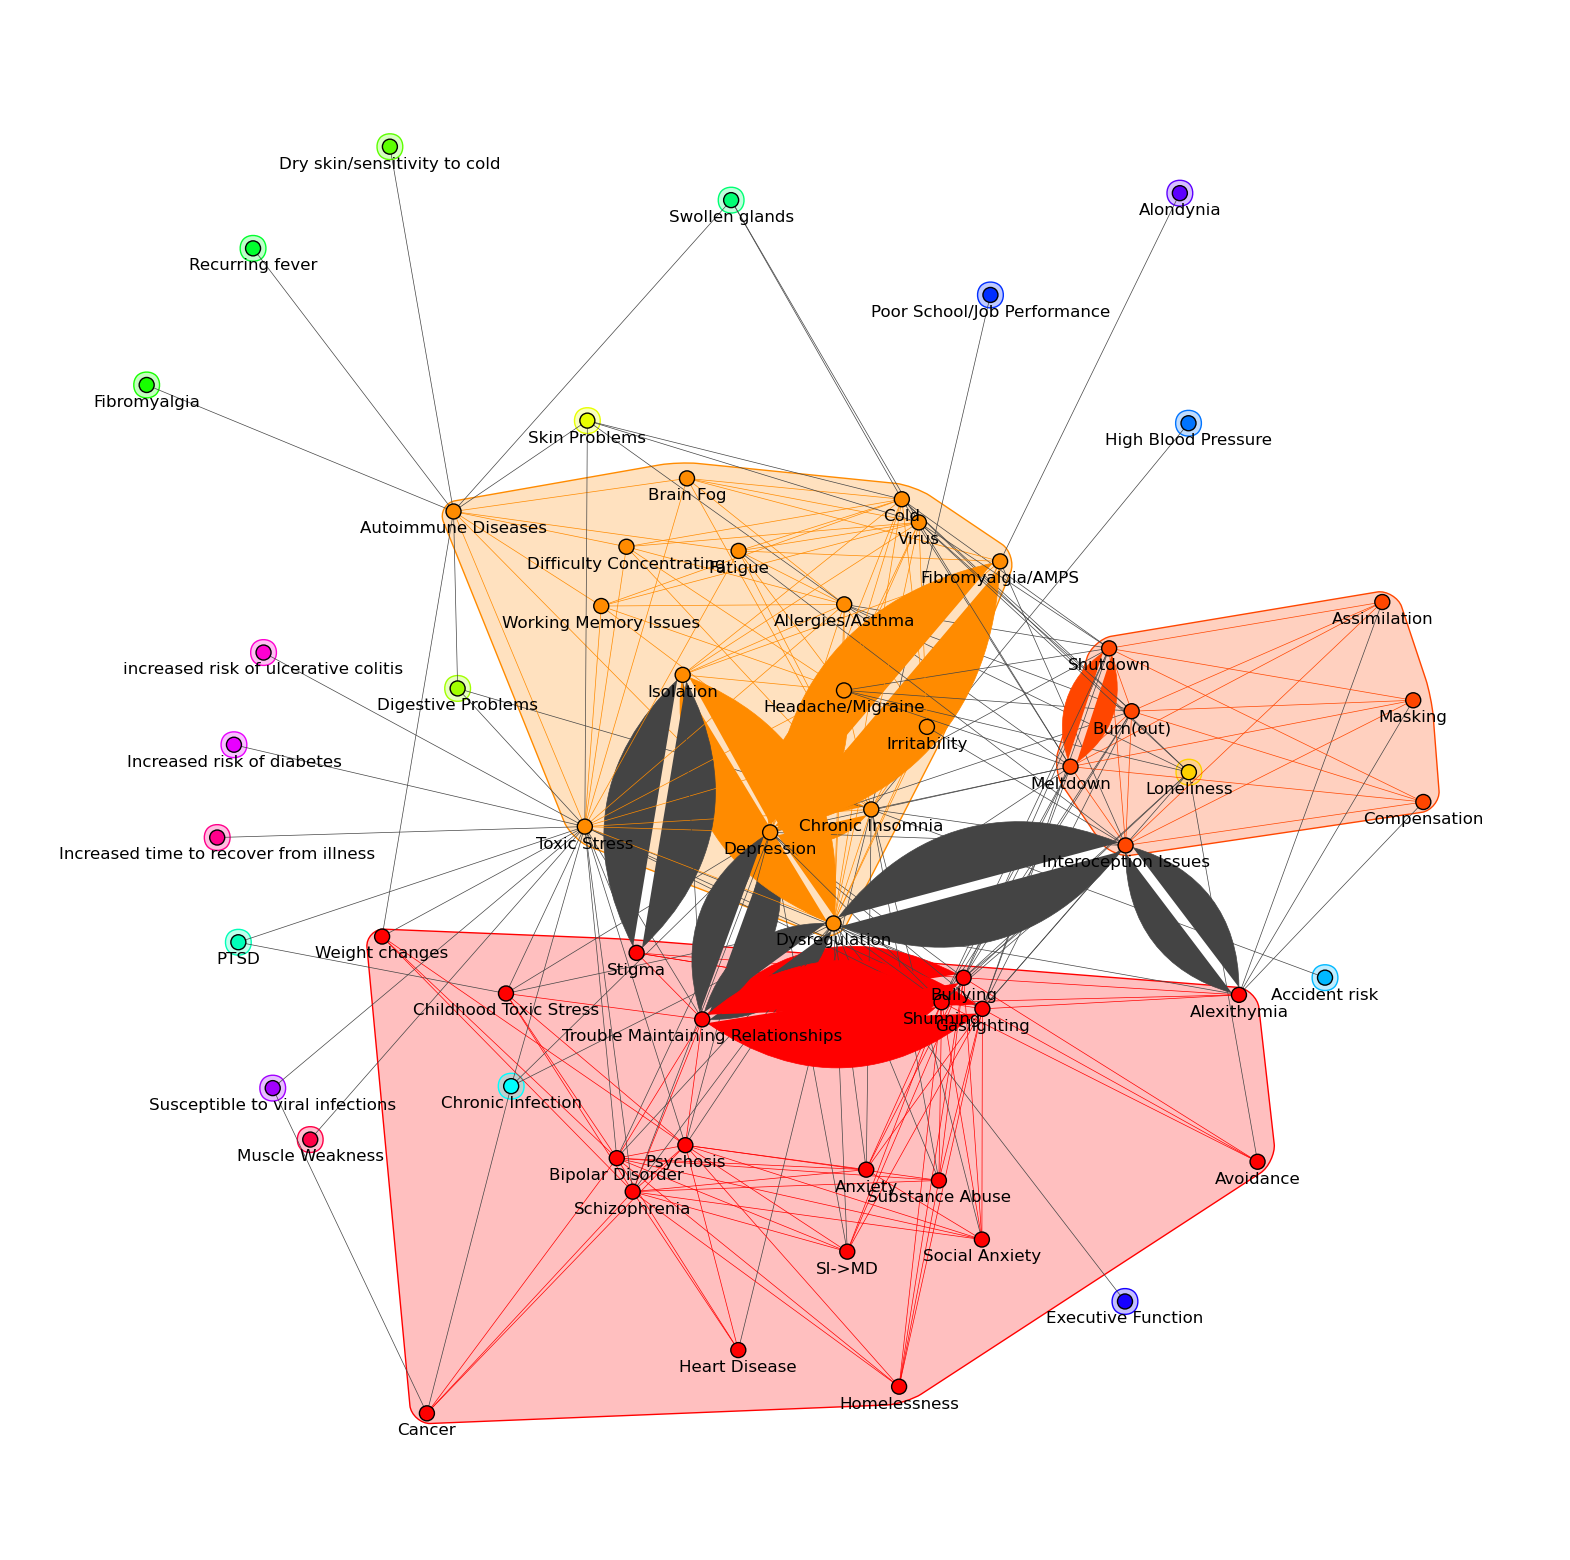

In [94]:
fig1, ax1 = plt.subplots()
ig.plot(
    communities,
    target=ax1,
    mark_groups=True,
    palette=palette1,
    vertex_size=15,
    edge_width=0.5,
)
fig1.set_size_inches(20, 20)

In [120]:
#got_data = pd.read_csv("shunning-isolation.csv")[["Source", "Target", "Weight"]]
data = pd.read_csv('got-edges.csv')


In [132]:
F = networkx.from_pandas_edgelist(data, 'Source', 'Target', 'Weight')
mapping = dict((n, i) for i, n in enumerate(F.nodes))
G = networkx.relabel_nodes(F, mapping)

In [133]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, EdgesAndLinkedNodes, NodesAndLinkedEdges, LabelSet
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap
from networkx.algorithms import community
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in networkx.degree(G)])
networkx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)
communities = community.greedy_modularity_communities(G)

In [134]:
# Create empty dictionaries
modularity_class = {}
modularity_color = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number and a distinct color
    for name in community: 
        modularity_class[name] = community_number
        modularity_color[name] = Spectral8[community_number]

In [141]:
#Choose colors for node and edge highlighting
node_highlight_color = 'white'
edge_highlight_color = 'black'

#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'modularity_color'

#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Blues8

#Choose a title!
title = 'Autistic Toxic Stress Model'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Source", "@index"),
        ("Degree", "@degree"),
         ("Modularity Class", "@modularity_class"),
        ("Modularity Color", "$color[swatch]:modularity_color"),
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#Set node sizes and colors according to node degree (color as category from attribute)
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=color_by_this_attribute)
#Set node highlight colors
network_graph.node_renderer.hover_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)
network_graph.node_renderer.selection_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.3, line_width=1)
#Set edge highlight colors
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)

#Highlight nodes and edges
network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()

plot.renderers.append(network_graph)

#Add Labels
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(F.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='10px', background_fill_alpha=.7)
plot.renderers.append(labels)

show(plot)
#save(plot, filename=f"{title}.html")

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : fill_color='modularity_color' [no close matches] {renderer: GlyphRenderer(id='p1902', ...)}
